# Homework Set 10


## Problem 1(Naive Bayes)

P(Purchase) = 9/14
P(not Purchase) = 5/14

P(Purchase | Age <= 30, Income = medium, Student = yes, Credit rating = Fair) = <br>
    P(Purchase) P(Age <= 30 | Purchase) P(Income = medium | Purchase) P(Student = yes | Purchase) P(Credit rating = Fair | Purchase) = <br>
    **9/14 * 2/9 * 4/9 * 6/9 * 6/9 = 0.0282186949**<br>

P(not Purchase | Age <= 30, Income = medium, Student = yes, Credit rating = Fair) = <br>
    P(not Purchase) P(Age <= 30 | not Purchase) P(Income = medium | not Purchase) P(Student = yes | not Purchase) P(Credit rating = Fair | not Purchase) = <br>
    **5/14 * 3/5 * 2/5 * 1/5 * 2/5 = 0.0068571429** <br>

P(Purchase) = **0.0282186949/(0.0068571429 + 0.0282186949) = 0.804505228382599**<br>
P(not Purchase) = **0.0068571429/(0.0068571429 + 0.0282186949) = 0.19549477161740095**<br>


Since P(Purchase) > P(not Purchase), <br>
**the person will but a computer.**


## Problem 2 (k-nearest neighbor)


In [1]:
from sklearn.neighbors import KNeighborsClassifier
import numpy as np
import matplotlib.pyplot as plt

In [36]:
def find_decision_boundary(X, Y):
    x1 = X[0]
    x2 = X[1]
    y1 = Y[0]
    y2 = Y[1]
    # Calculate the slope (m)
    m = (y2 - y1) / (x2 - x1)

    # Calculate the y-intercept (b)
    b = y1 - m * x1
    print(f'y = {m}x + {b}')
    return m, b
    
    
def is_distance_e(pt, type):
    pts_type = np.array([[1, 1], [3, 3], [4, 2]])
    if type == 12:
        pt_1 = pts_type[0]
        pt_2 = pts_type[1]
    elif type == 13:
        pt_1 = pts_type[0]
        pt_2 = pts_type[2]
    elif type == 23:
        pt_1 = pts_type[1]
        pt_2 = pts_type[2]
    d1 = np.linalg.norm(pt - pt_1)
    d2 = np.linalg.norm(pt - pt_2)
    if d1 == d2:
        return True

def find_vertical_line_equation(point1, point2):
    x1, y1 = point1
    x2, y2 = point2
    xm, ym = (point1 + point2)/2
    
    # Calculate the slope of the line between the two points
    slope = (y2 - y1) / (x2 - x1)
    
    # Calculate the slope of the perpendicular line
    perpendicular_slope = -1 / slope
    
    # Calculate the y-intercept of the perpendicular line
    # We can use either point1 or point2 to calculate the y-intercept
    # Let's use point1
    y_intercept = ym - perpendicular_slope * xm
    print(f"y = {perpendicular_slope}x + {y_intercept}")
    # Return the equation of the perpendicular line in the form y = mx + b
    return perpendicular_slope, y_intercept


    

y = -1.0x + 4.0
(-1.0, 4.0)
y = 1.0x + -1.0
(1.0, -1.0)
y = -3.0x + 9.0
(-3.0, 9.0)


In [40]:
x_test = np.linspace(0, 5, 3001)

pts = np.array([[1, 1], [3, 3], [4, 2]])
y_test = []
for i in range(3):
    m, b = find_vertical_line_equation(pts[i], pts[(i+1)%3])
    y = m*x_test + b
    y_test.append(y)
print(y_test)

m1, b1 = find_vertical_line_equation(pts[0], pts[1])
m2, b2 = find_vertical_line_equation(pts[0], pts[2])
x_int = (b1 - b2)/(m2 - m1)
y_int = m1*x_int + b1



# find_decision_boundary(intercept_12[0], intercept_12[1])     


y = -1.0x + 4.0
y = 1.0x + -1.0
y = -3.0x + 9.0
[array([ 4.        ,  3.99833333,  3.99666667, ..., -0.99666667,
       -0.99833333, -1.        ]), array([-1.        , -0.99833333, -0.99666667, ...,  3.99666667,
        3.99833333,  4.        ]), array([ 9.   ,  8.995,  8.99 , ..., -5.99 , -5.995, -6.   ])]


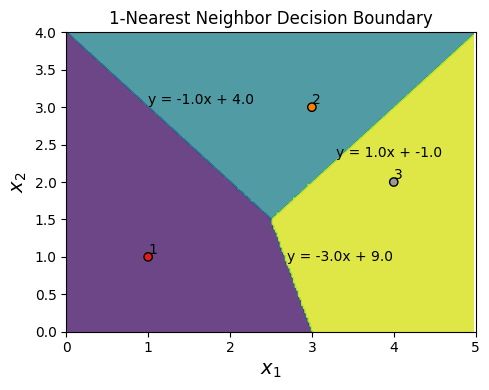

In [48]:



# Define the training data
X_train = np.array([[1, 1], [3, 3], [4, 2]])
y_train = np.array([1, 2, 3])

# Create the 1-nearest neighbor classifier
knn = KNeighborsClassifier(n_neighbors=1)

# Fit the classifier to the training data
knn.fit(X_train, y_train)

# Define the test data
X_test = np.array([[2, 2]])

# Predict the class labels for the test data
y_pred = knn.predict(X_test)

# Plot the decision boundary
h = 0.02  # step size in the mesh
x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])


# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(figsize=(5, 4))
plt.contourf(xx, yy, Z, alpha=0.8)

# Plot the training points
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=plt.cm.Set1, edgecolor='k')
# plt.scatter(X_test[:, 0], X_test[:, 1], c='r', marker='x', label='Test Data')
# plt.plot(x_test, y_test[0], 'k', ls='dotted', lw=1, label='y = -1.0x + 4.0')
# plt.plot(x_test, y_test[1], 'k', ls='dotted', lw=1, label='y = 1.0x + -1.0')
# plt.plot(x_test, y_test[2], 'k', ls='dotted', lw=1, label='y = -3.0x + 9.0')
plt.text(2.7, -3 * 2.7 + 9, 'y = -3.0x + 9.0', ha='left', va='bottom')
plt.text(3.3, 1.0 * 3.3 + -1, 'y = 1.0x + -1.0', ha='left', va='bottom')
plt.text(1, -1.0 * 1 + 4, 'y = -1.0x + 4.0', ha='left', va='bottom')
plt.xlabel(r'$x_1$', fontsize=14)
plt.ylabel(r'$x_2$', fontsize=14)
plt.title('1-Nearest Neighbor Decision Boundary')
for i, label in enumerate(y_train):
    plt.text(X_train[i, 0], X_train[i, 1], str(label), ha='left', va='bottom')
# plt.legend()
plt.axis([x_min, x_max, y_min, y_max])
plt.tight_layout()
plt.savefig('decision_boundary.png', dpi=300)
plt.show()


